# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


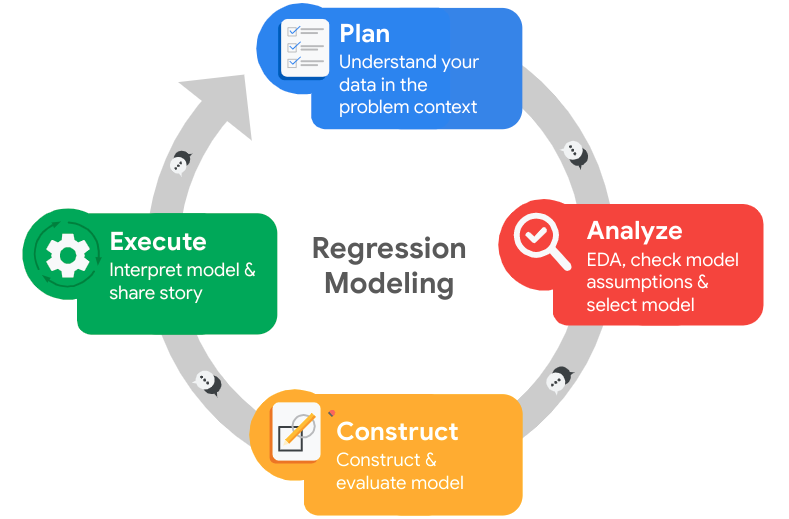

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders for this project include the HR department, management team, and company executives who are seeking to identify factors which will help them predict employee departure/turnover

2. The aim is to analyse conintious and discrete data regarding employee turnover and identify key factors influencing departure rates thus empowering the company to take proactive, target action to increase employee retention and improve workforce management.

3. Initial observations from the data exploration include:

- The dataset contains various fields with a variety of data such as satisfaction level, last evaluation, number of projects, average monthly hours, tenure, department, workplace accidents and much more
- There is an imbalance in the target binary variable 'left', which indicates that although turnover is an issue over 80% of employees are retained.
- There are different salary levels and departments represented in the dataset.

Technical resources requried include:

Libraries:

    pandas
    numpy
    seaborn
    matplotlib.pyplot
    sklearn.linear_model
    sklearn.model_selection
    sklearn.metrics

Packages:

    sklearn.linear_model.LogisticRegression
    sklearn.model_selection.train_test_split
    sklearn.metrics.accuracy_score
    sklearn.metrics.precision_score
    sklearn.metrics.recall_score
    sklearn.metrics.f1_score
    sklearn.metrics.confusion_matrix
    sklearn.metrics.ConfusionMatrixDisplay
    sklearn.metrics.classification_report
    sklearn.metrics.roc_auc_score
    sklearn.metrics.roc_curve

Ethical considerations include: 
- ensuring data privacy and security
- obtaining informed consent from employees whose data is used for analysis
- Ensuring performance statistics are given with the models outcomes. 
- It is essential to avoid bias in both the data and model results to ensure fairness and prevent discriminatory practices, whether from the analyst or the data collector.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [91]:
# Import packages 

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data Modelling Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [45]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [46]:
# Gather basic information about the data

print(df0.info())
print()
print("Data Frame size : " + str(df0.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Data Frame size : (14999, 10)


### Gather descriptive statistics about the data

In [47]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [48]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [49]:
# Renaming and displaying columns as needed

df0 = df0.rename(columns={'time_spend_company': 'tenure', 'Department':'department', 'Work_accident':'work_accident',
                         'average_montly_hours':'average_monthly_hours'})

df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [50]:
# Checking for any missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [51]:
# Checking for duplicates entries to data set that may affect model quality
df0.duplicated().sum()


3008

In [52]:
# Inspecting 3008 rows containing duplicate values
duplicates = df0[df0.duplicated(keep=False)]

duplicates

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [53]:
# Droping all duplicates after the first occurance and save resulting dataframe in a new variable, 
df1 = df0.drop_duplicates(keep ='first')

# Displaying first few rows of new dataframe

df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

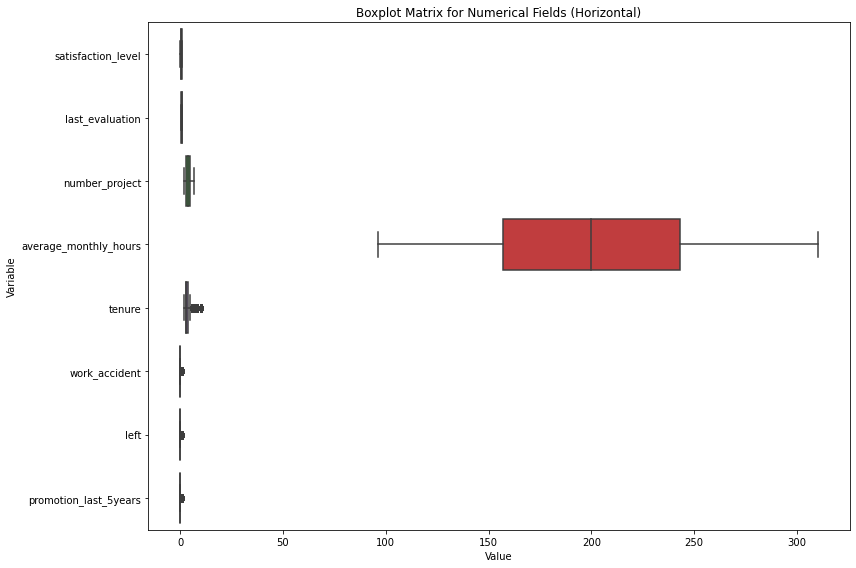

In [54]:
#Taking only numerical plots
df1_numerical = df1.select_dtypes(include=['number'])

melted_df = df1_numerical.melt(var_name='Variable', value_name='Value')

# Setting up the plot
plt.figure(figsize=(12, 8))  # Adjust the figure size for a wider plot
sns.boxplot(y='Variable', x='Value', data=melted_df)  # Swap x and y for horizontal boxplots

# Add labels and a title
plt.xlabel("Value")
plt.ylabel("Variable")
plt.title("Boxplot Matrix for Numerical Fields (Horizontal)")

# Show the plot
plt.tight_layout()
plt.show()


This was a good start by my approach now needs to change for two reasons
- Not all the numeric columns have a range of values, some of them are binary and so do not need to be included in the plot
- Due to the difference in scale, some of the box plots are rendered hard to read by the valies in average_monthly_hours being so much higher. I considered using a logarithmic scale along the x axis to make it easier to read but this would adjust the position of outliers and not be helpful

So instead I have decied to use a for loop to create a series of box plots for specified columsn, this should be easier to now read

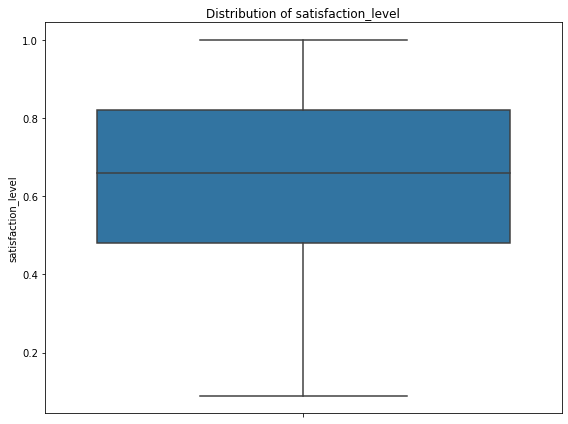

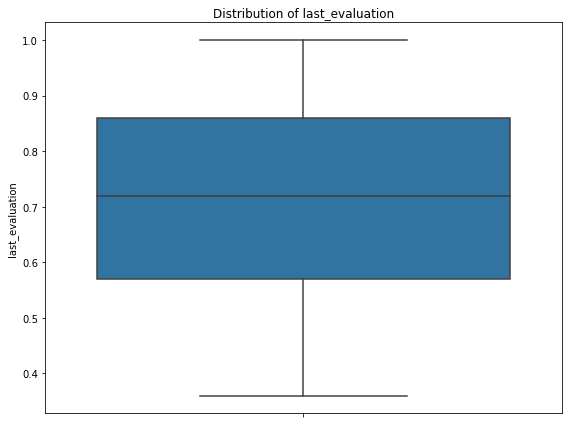

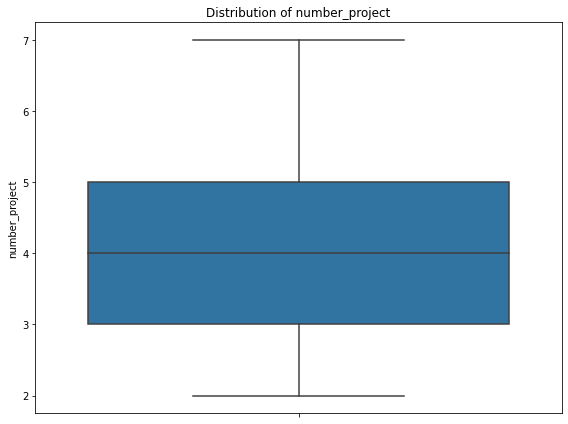

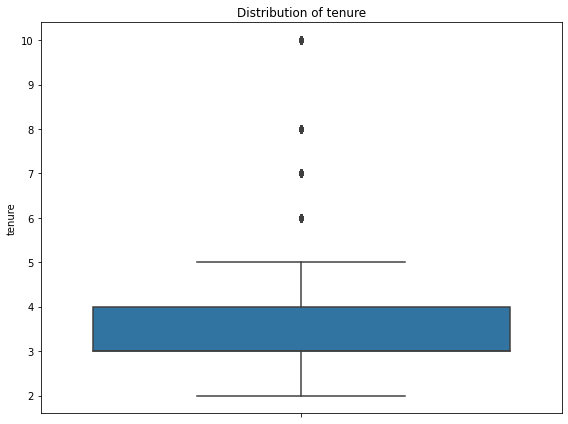

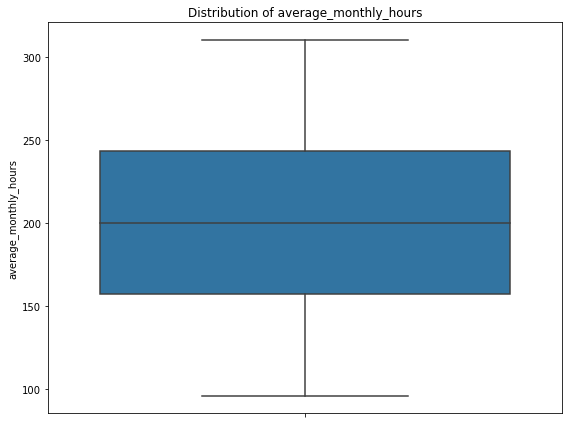

In [55]:
# Adding in Boxplots for a select range of columns for evaluation

df_numeric = df1[['satisfaction_level', 'last_evaluation', 'number_project', 'tenure', 'average_monthly_hours']]

for col in df_numeric:
    plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
    sns.boxplot(y=df_numeric[col])
    plt.title(f"Distribution of {col}")  # Dynamic title
    plt.ylabel(col)
    plt.tight_layout()  # Ensures layout fits well
    plt.show()


This has done a better job, from here I can see that I might want to get a better picture of the outliers in the tenure field, so I will create a single new boxplot to evaluate the distribution of values and outliers in this field

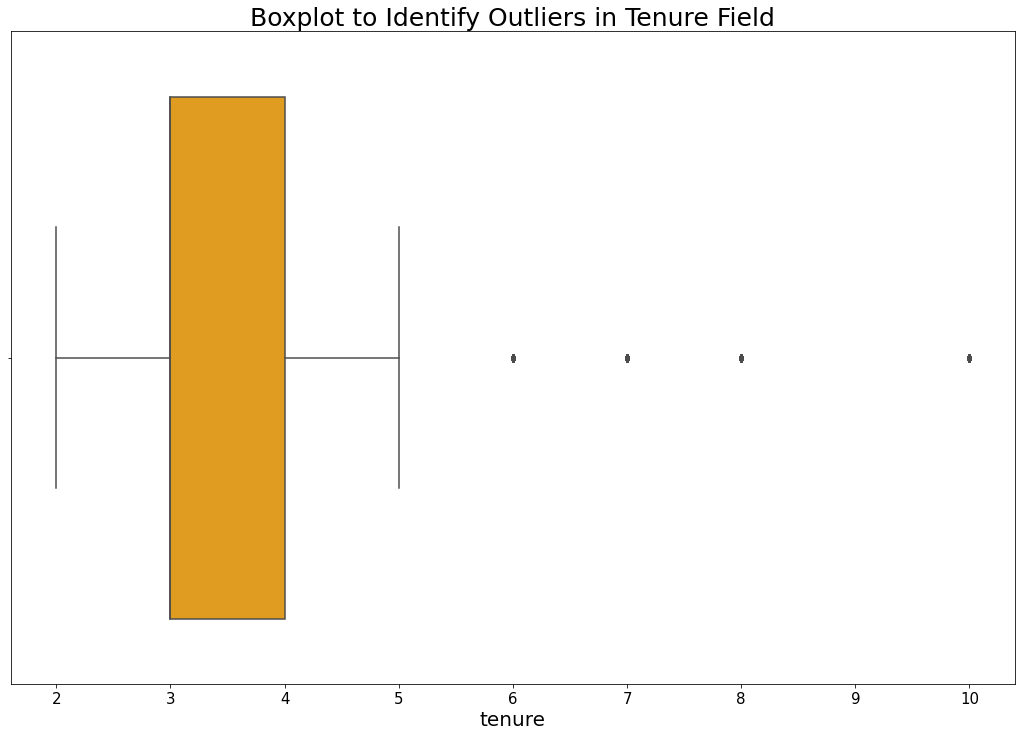

In [56]:
# Creating a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(18,12))

plt.title('Boxplot to Identify Outliers in Tenure Field', fontsize = 25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Tenure', fontsize=20)

sns.boxplot(data = df1, x = df1['tenure'], color = 'orange')

plt.show()

From here it is necessary to begin exploring how many of the rows in this field sit outside the upper and lower limits to determine if they could potentially be detrimental to the quality of my model

In [57]:
# Determine the number of rows containing outliers using IQR

#defining quartiles
q1 = df1['tenure'].quantile(0.25)

q3 = df1['tenure'].quantile(0.75)

#calculating IQR
iqr = q3-q1

#setting upper and lower limits
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# creating variable of outlier records
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]


#results
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

print(str(outliers.shape))

Lower limit: 1.5
Upper limit: 5.5
(824, 10)


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Here I can see 824 records are outliers in the tenure field, a sizeable number therefore it may be the case that they will have to be dropped

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [58]:
#Quickly assessing numbers of people who left vs. stayed
print('Number of people who left:')
print(df1['left'].value_counts())

print()

print('Percentage of people who left:')
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True) * 100)

Number of people who left:
0    10000
1     1991
Name: left, dtype: int64

Percentage of people who left:
0    83.39588
1    16.60412
Name: left, dtype: float64


There is an inbalance between the retained employees and those who left

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

First it would be good to visualise the difference between leavers and remaining employees

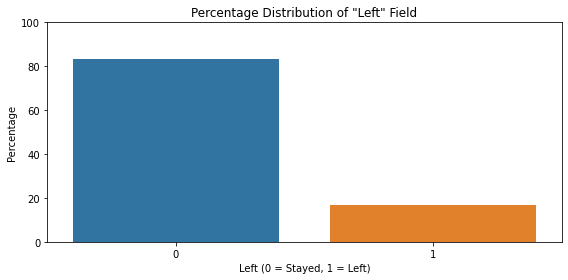

In [59]:
#Bar plot to display proportion of difference in those who left vs remained
#This could work with a pie chart, but best practice is to use a horizontal bar plot for occasions where difference is closer

# Assign percentage distribution to variable
left_percentages = df1['left'].value_counts(normalize=True) * 100

# Prepare data for plotting
left_data = left_percentages.reset_index()  # Reset Index
left_data.columns = ['Left', 'Percentage']

#Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=left_data['Left'], y=left_data['Percentage'])
plt.title('Percentage Distribution of "Left" Field')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.tight_layout()
plt.show()

It would be good to see a histogram to visualise the distribution of values in the numeric columns as well as to plot that against the Kernel Density Estimate for a smoothed view. We can recall the df_numeric variable to help with this in another loop for effiecency 

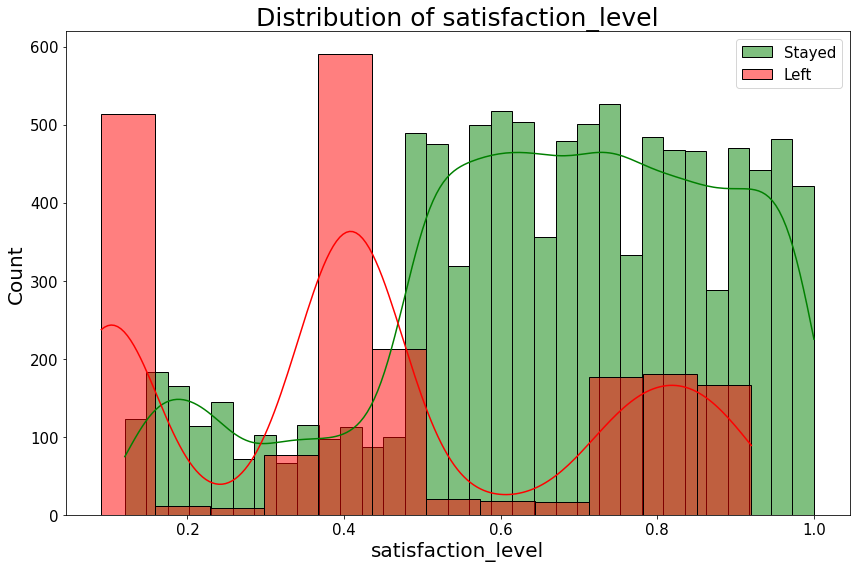

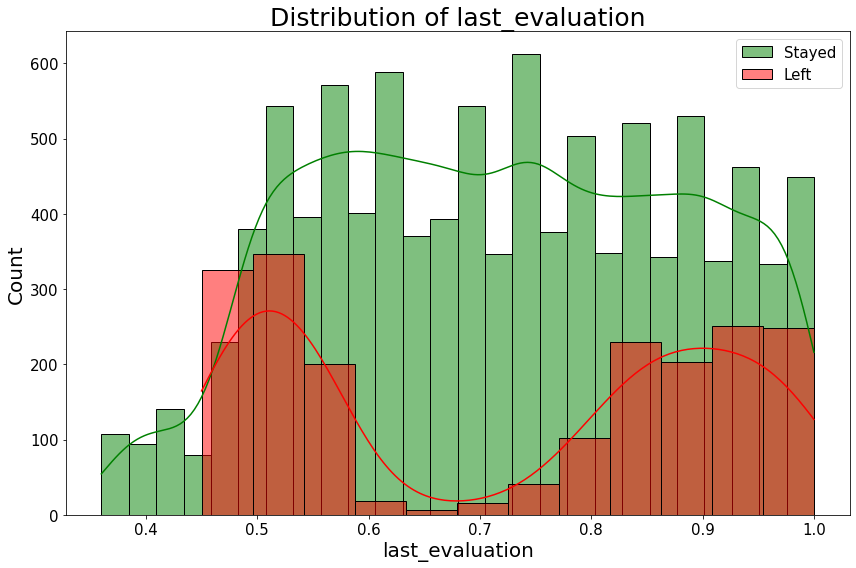

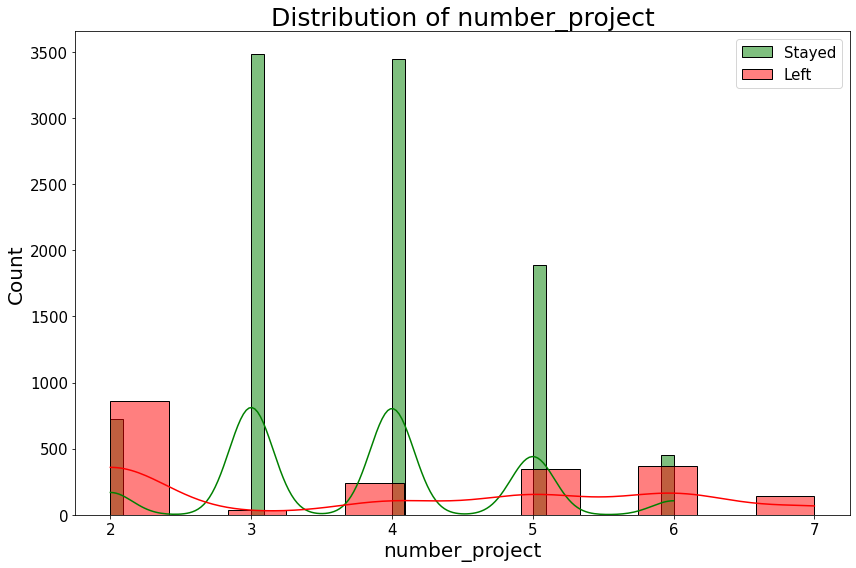

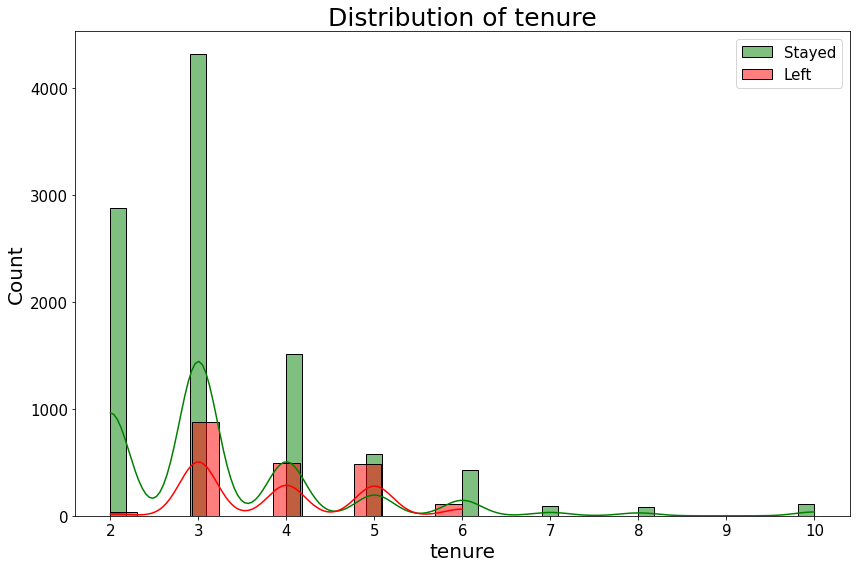

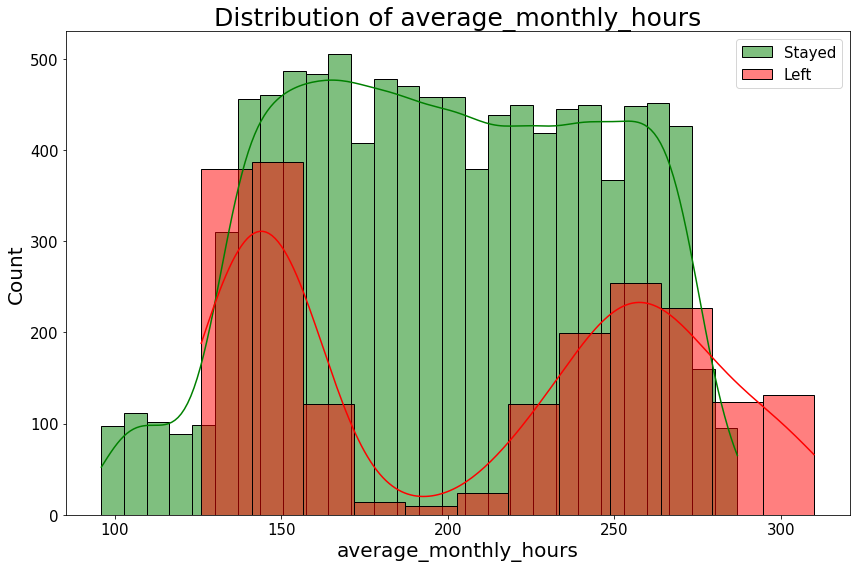

In [60]:
for col in df_numeric:
    plt.figure(figsize=(12, 8))  # Adjust figure size for clarity
    # Plotting the histogram for 'left' == 0 (Stayed) with KDE
    sns.histplot(df1[df1['left'] == 0][col], kde=True, color='green', label='Stayed')

    # Plotting the histogram for 'left' == 1 (Left) with KDE
    sns.histplot(df1[df1['left'] == 1][col], kde=True, color='red', label='Left')
    
    #Formatting
    plt.title(f"Distribution of {col}", fontsize=25)  # Dynamic title
    plt.ylabel("Count", fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.tight_layout()  # Ensures layout fits well
    plt.show()

From here I want to quickly investigate if any of the categorical variables can shed any light on why people are leaving. I will start with a count plot of the departments.

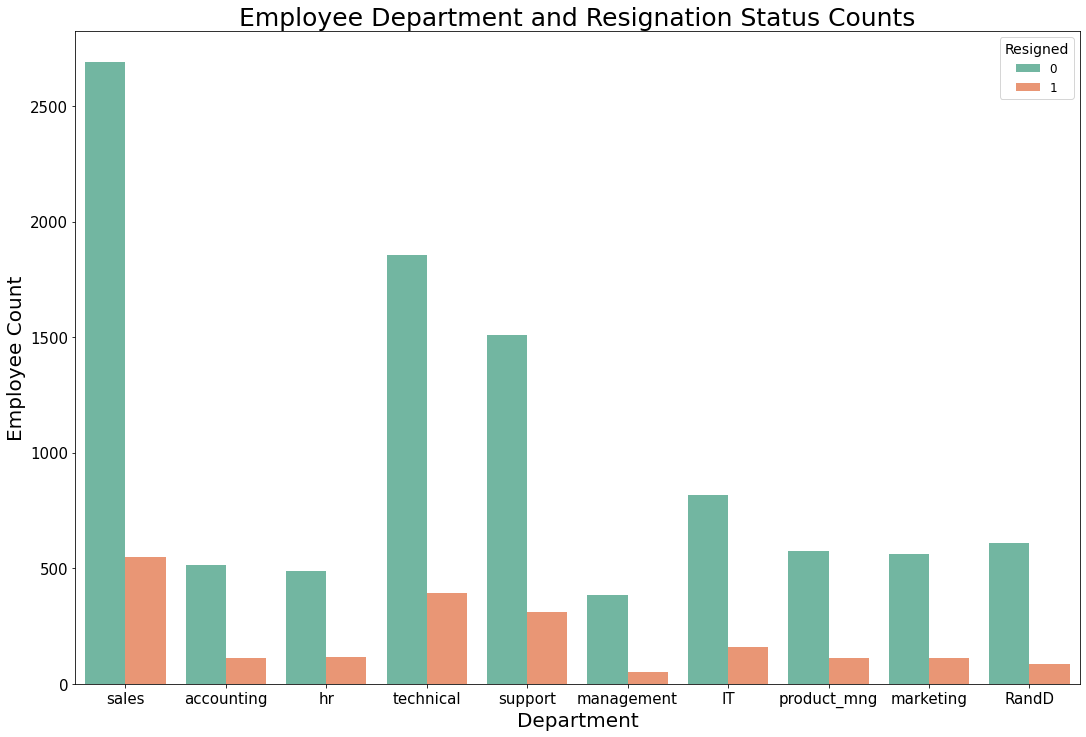

In [61]:
# Are there any departments which have high number of leavers?
plt.figure(figsize = (18,12))
sns.countplot(data=df1, x='department', hue='left', palette='Set2')
plt.title("Employee Department and Resignation Status Counts", fontsize = 25)
plt.xlabel("Department", fontsize = 20)
plt.ylabel("Employee Count", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(title="Resigned", fontsize=12, title_fontsize=14)
plt.show()


This plot shows that the Sales and technical department had the highest number of leavers of any department but these values are not significant enough to conclude that these two departments are significant factors in employee departure as they have the highest total headcount.

It may be worth double checking this against a graph which shows the number of employees per department who left as a percentage of all employees who left

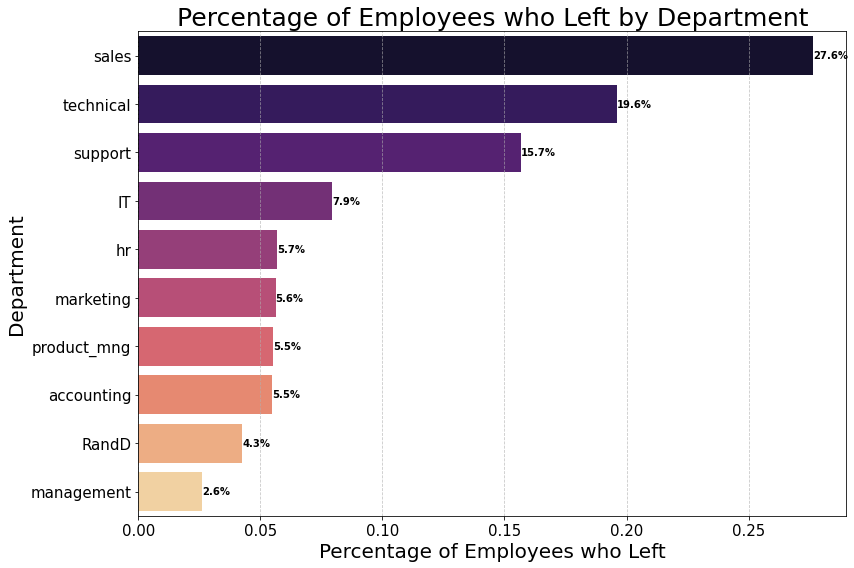

In [62]:
# Calculate the proportion of employees who left in each department
df_left = df1[df1['left'] == 1]['department'].value_counts(normalize=True)

# Sort values for better display on graph
df_left = df_left.sort_values(ascending=False)

# Create the  bar plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette('magma', len(df_left))
ax = sns.barplot(x=df_left.values, y=df_left.index, palette=colors)
plt.xlabel('Percentage of Employees who Left', fontsize=20)
plt.ylabel('Department', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Percentage of Employees who Left by Department', fontsize=25)

# Add data labels to the bars
for i, value in enumerate(df_left.values):
    ax.text(value, i, f'{value:.1%}', va='center', color='black', fontweight='bold',
            fontsize = 10)

# Add gridlines for better comparison
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Automatically adjust the layout for better spacing
plt.tight_layout()


Here this confirms the departments with the highest turnover are the Sales and Technical department and the highest retention rates are in RnD and Management

It would be interesting to see if there were other contributing factors to resignations in these departments such as pay, we can look at this through a heatmap of the average value of the left field when grouped by both department and salary band

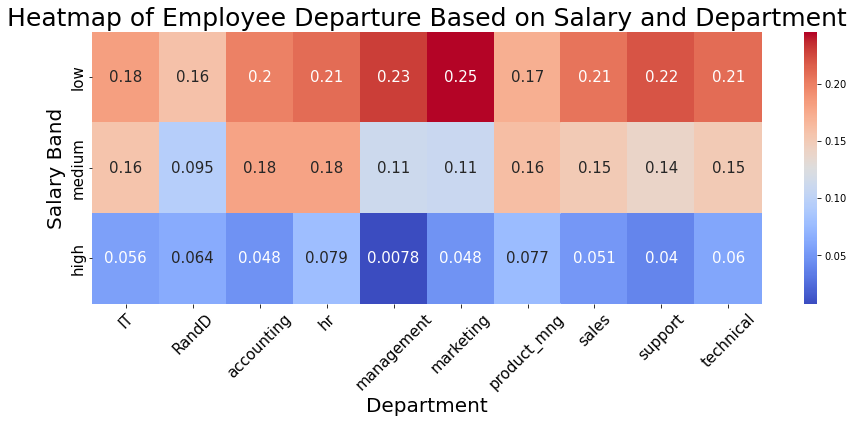

In [63]:
df2 = df1.groupby(['department', 'salary'])['left'].mean()
df2 = pd.DataFrame(df2).reset_index()
df2 = df2.pivot_table(index='salary', columns='department', values='left')
df2 = df2.reindex(['low', 'medium', 'high'])
plt.figure(figsize=(15,5))
sns.heatmap(df2, cmap='coolwarm', annot=True, annot_kws={"size": 15})
plt.title('Heatmap of Employee Departure Based on Salary and Department', fontsize = 25)
plt.xlabel("Department", fontsize = 20)
plt.ylabel("Salary Band", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation=45)
plt.show()

- Higher salaries tend to ensure that there are lower resignatoin rates across all departments
- Lower salaries tend to have the higher resignation rates
- Whilst the highest resignation rates in the low salary band are in the Marketing and Management departments with 25% and 30% repsectively, these do not appear significant enough to be pursued further with limited resources
- When reffering back to the previous graph on proportion of employee departures by department we can see those badly affected departments such as sales and technical had higher average departures at the lower and medium end salaries
- Management and rnd which had higher retention rates had much lower rates of departure in the medium to high salary bands

Next I would like to check the same thing with Accidents in the workplace

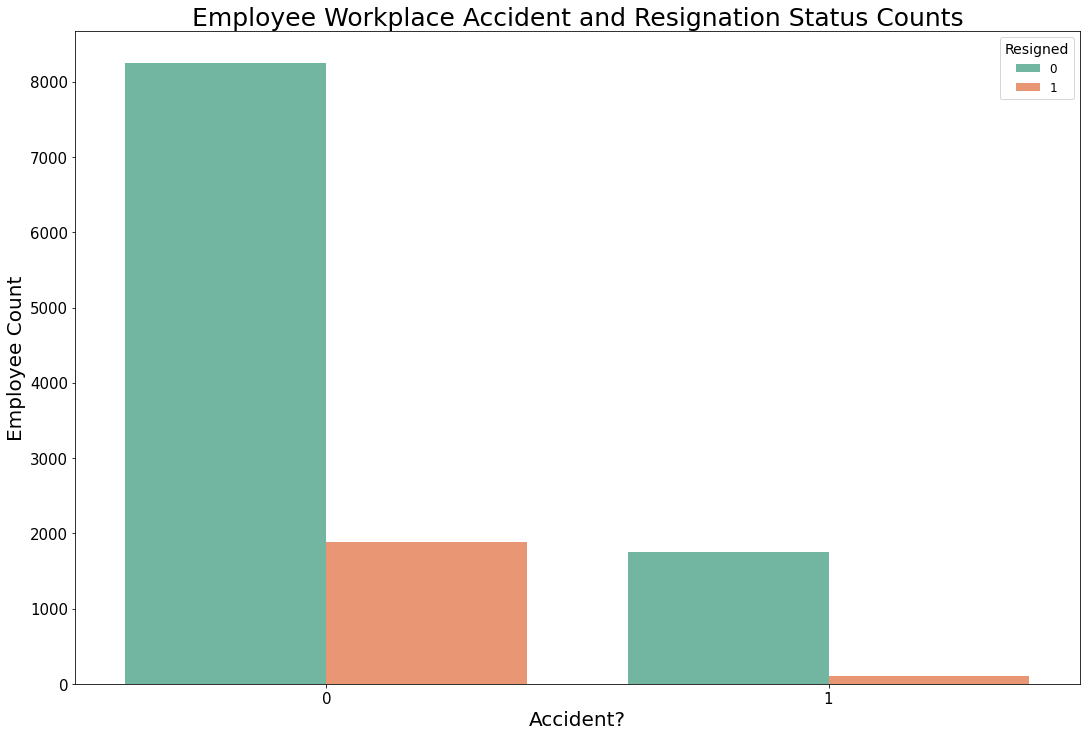

In [64]:
# What proportion of employees who had accidents had high number of leavers vs those that didnt?
plt.figure(figsize = (18,12))
sns.countplot(data=df1, x='work_accident', hue='left', palette='Set2')
plt.title("Employee Workplace Accident and Resignation Status Counts", fontsize = 25)
plt.xlabel("Accident?", fontsize = 20)
plt.ylabel("Employee Count", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(title="Resigned", fontsize=12, title_fontsize=14)
plt.show()

The graph does not immediatly betray any signs of a difference but it would be good to check the numerical values as a percent 

In [65]:
print(df1[df1['work_accident'] == 0][['work_accident','left']].value_counts(normalize=True) * 100)

print(df1[df1['work_accident'] == 1][['work_accident','left']].value_counts(normalize=True) * 100)

work_accident  left
0              0       81.402229
               1       18.597771
dtype: float64
work_accident  left
1              0       94.324324
               1        5.675676
dtype: float64


As confirmeed by the graph this does show an interesting factor, that only 5.67% of workers who experienced a workplace accident left the company

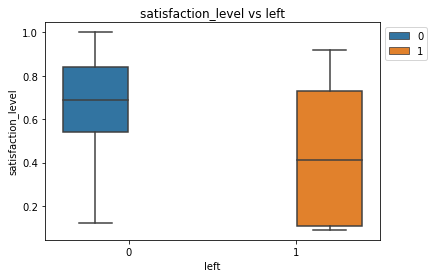

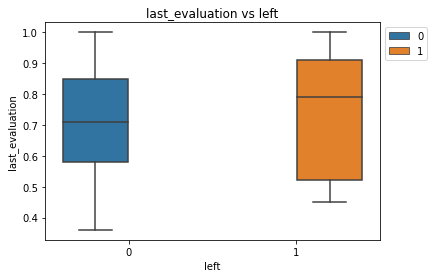

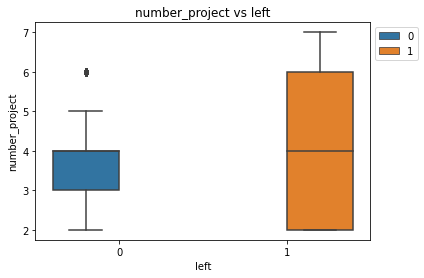

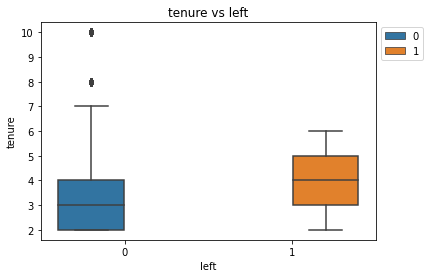

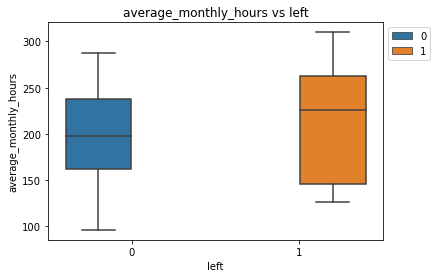

In [66]:
# Adding in Boxplots for a select range of columns for evaluation using the previously defined variable df_numeric

for col in df_numeric:
    sns.boxplot(y=df1[col], x=df1['left'], hue=df1['left'])
    plt.title(str(col) + " vs left")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position as needed
    plt.show()


- Employees with higher average working hours could be more likely to leave

- Employees who are tenured for longer are more likely to leave with the exception of a few long term employees. This can represent the natural progression of careers to other companies, and the few who stay on to become c-suite level. Shorter term employees could be staying to grow their careers.

- Employees with lower satisfaction levels are more likely to leave as well

- Employees most recent evaluation score doesn't seem to have a significant impact

- Employees who left had a very broad range of project numbers and retained employees mostly have 3-4 projects

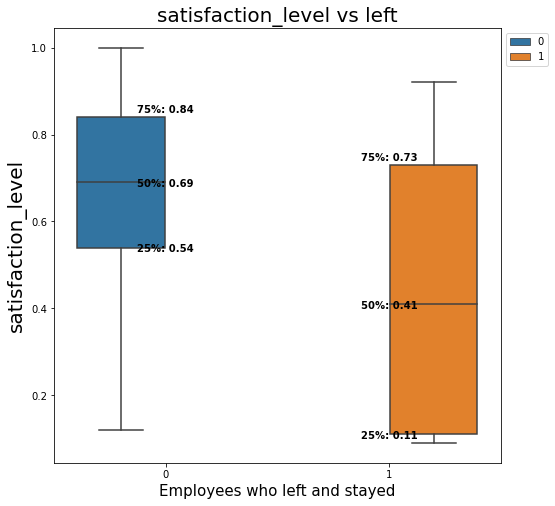

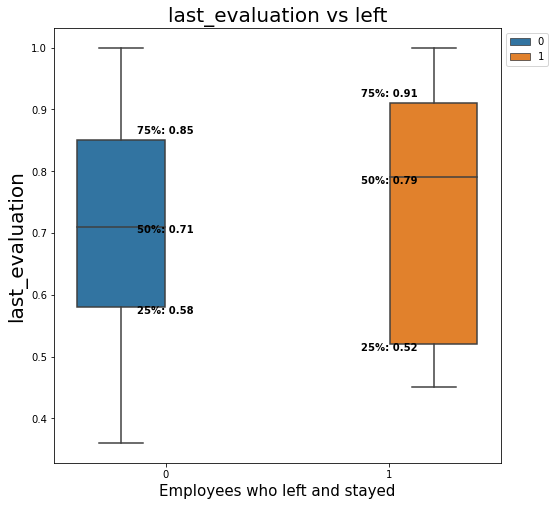

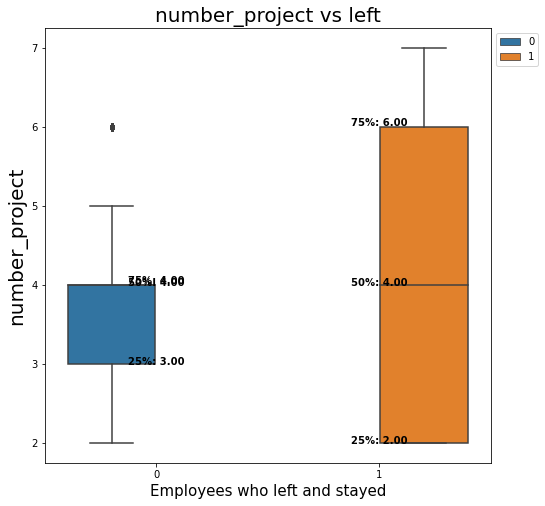

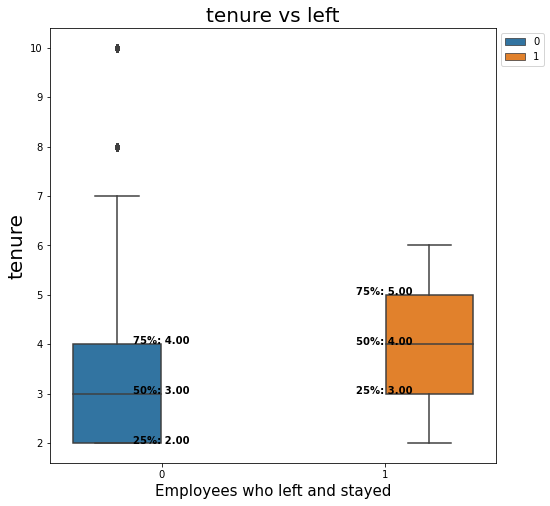

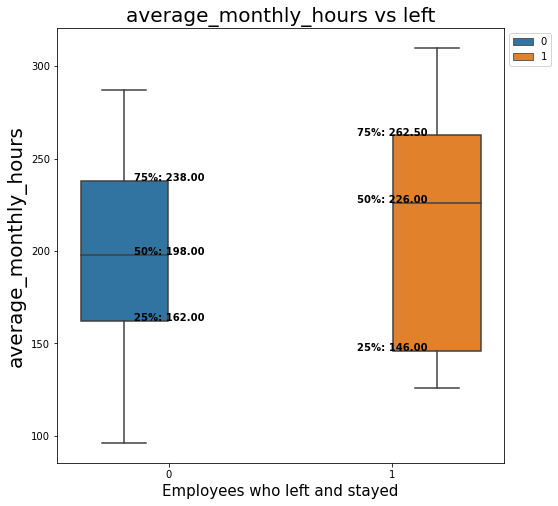

In [67]:
# Adding in Boxplots for a select range of columns for evaluation using the previously defined variable df_numeric

for col in df_numeric:
    # Create the boxplot
    plt.figure(figsize=(8, 8))
    sns.boxplot(y=df1[col], x=df1['left'], hue=df1['left'])
    
    # Set the title with font size 25 and bold
    plt.title(f"{col} vs left", fontsize=20)
    
    # Adjust the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position as needed
    
    # Set axis labels with font size 20 and bold
    plt.xlabel('Employees who left and stayed', fontsize=15)
    plt.ylabel(col, fontsize=20)
    
    # Set tick labels with font size 10
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Calculate statistics for each boxplot
    stats = df1.groupby('left')[col].describe()
    
    # Annotate the quartiles with bold, centred labels
    for i, label in enumerate(stats.index):
        # 75th percentile (top of the box)
        plt.text(i, stats.loc[label, '75%'] + 0.01, f"75%: {stats.loc[label, '75%']:.2f}", ha='center', color='black',
                 fontweight='bold')
        # 50th percentile (median line)
        plt.text(i, stats.loc[label, '50%'] - 0.01, f"50%: {stats.loc[label, '50%']:.2f}", ha='center', color='black',
                 fontweight='bold')
        # 25th percentile (bottom of the box)
        plt.text(i, stats.loc[label, '25%'] - 0.01, f"25%: {stats.loc[label, '25%']:.2f}", ha='center', color='black',
                 fontweight='bold')
    
    # Show the plot
    plt.show()


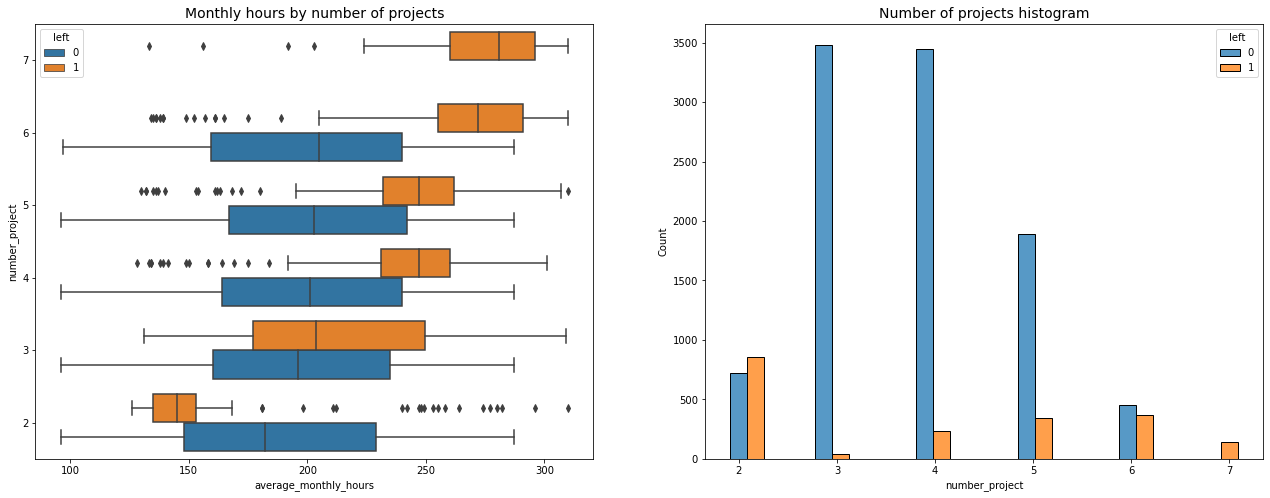

In [68]:
# Average Monthly Hours vs Number of Contributing Projects by Retention

# setting up a double display

fig, ax = plt.subplots(1, 2, figsize = (22,8))

#setting the box plot ensuring horizontal orientation to clearly show complex data
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

#setting the histogram
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

#displaying plots
plt.show()

We can tell a lot from this initial analysis:

- Employees who left while working on 2 projects only tended to work less hours on average, this is to be expected as often businesses will phase out employee workloads as they prepare to end their contracts. This could be due to severance, dismissal or filling out a notice period.

- However employees who left the company and were working on 6 projects seemed to be working far more hours on average than their felow employees who stayed. The box plot shows an IQR of employees who left while working on 6 projects at a time as working between ~ 250-280 hours a month, or ~62.5-70 hours a week if we assume 4 weeks annual leave.

- The optimum range seems to be in 3-5 projects range for employee retention based on the ratios between the two.

- All employees who worked on 7 projects appear to have left the company, I want to confirm this with a boxplot below

It would be helpful going forward when we are investigating the hours worked column to have a baseline to graph against of an average month

In [69]:
# A theoretical baseline for average monthly hours worked

Weeks = 48 

Months = 12

Hours = 40

print("Theoretical baseline for average hours per months : " + str((Weeks * Hours)/Months))

Theoretical baseline for average hours per months : 160.0


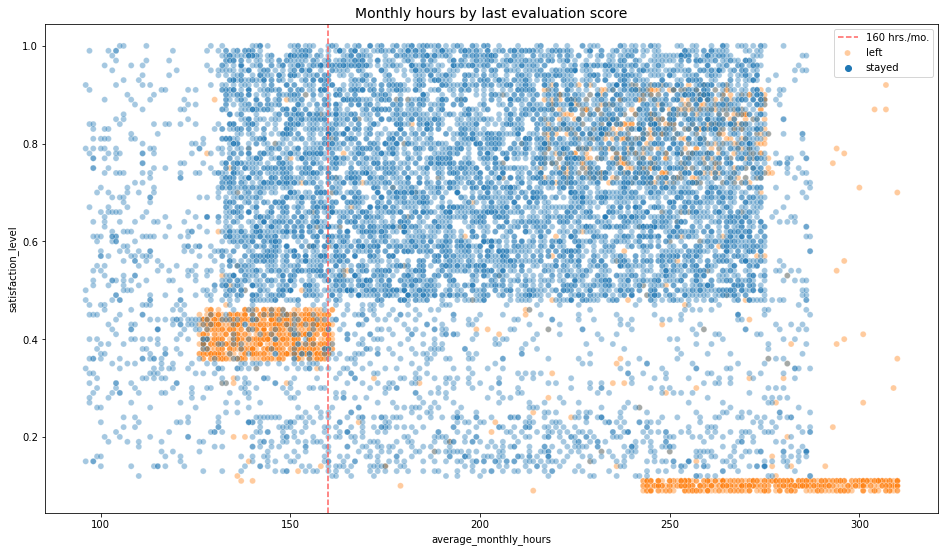

In [70]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['160 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


- There is a large group of employees with a high number of hours, between ~240-310 hours per month on average, with exceptionally low satisfaction scores at close to 0.0 - this likely represents employees with a heavy workload beyond their bandwidth or capacity

- Another cluster of employees who left sits closer to the lower end of average hours, ~130-160 hours on average a month with lower satisfaction scores. This likely represent's employees who's disatisfaction is related to other, potentially unquantifiable factors.

- A large cluster of retained employees seem to be clouded around higher satisfaction levels despite their long hours in many cases. This could represent potentially synthetic data where employees worried about anonimity have felt compelled to rate their satisfaction highly.

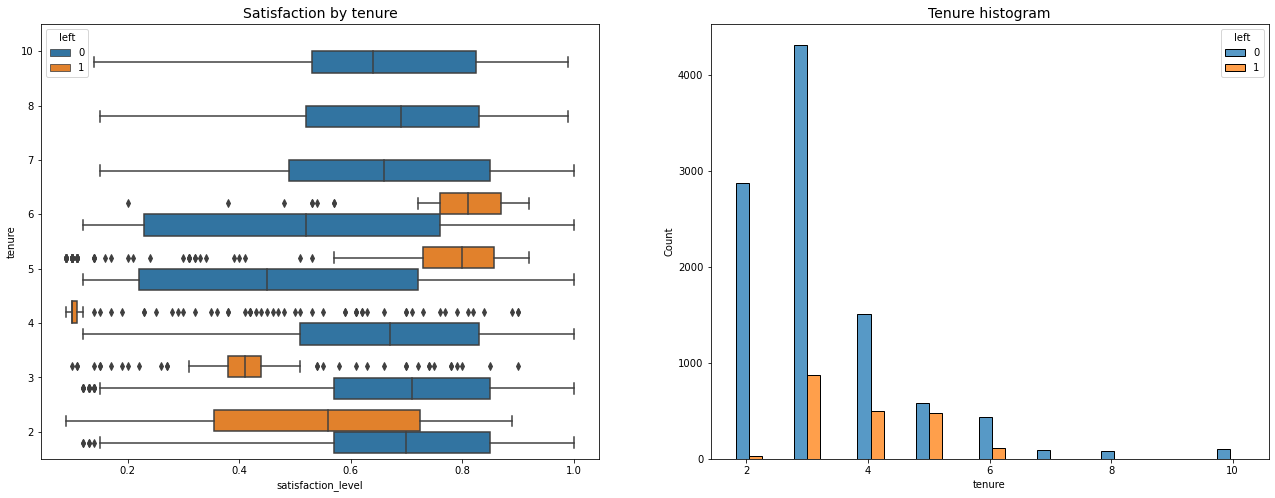

In [71]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

- Employees who left fall mostly in to two categories, unsatisfied employees with lower tenures and satisfied employees with medium term careers
- In the former case these seem like employees who have tried out their roles but ultimately decided to move on, in the latter it could be a case of those employees seeking out senior oppourtunities elsewhere where they had better offers.
- Employees who left in year 4 have a significantly low level of satisfaction with most scores less than 0.2
- Employees who remained beyond 6 years seem not to leave, in corroboration with the histogram showing a small number of longer tenured employees suggests that these employees are the senior to c-suite level employees who have longer career plans.
- salary could also be playing a potential role in satisfaction levels and therefore tenure and departure from the company, investigating this further could prove useful

In [72]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


- Employees who left had lower median and mean satisfaction scores than retained employees as expected
- the median value of satisfaction scores for retained employees is lower than the average, suggesting some outliers skewing the values to the left.

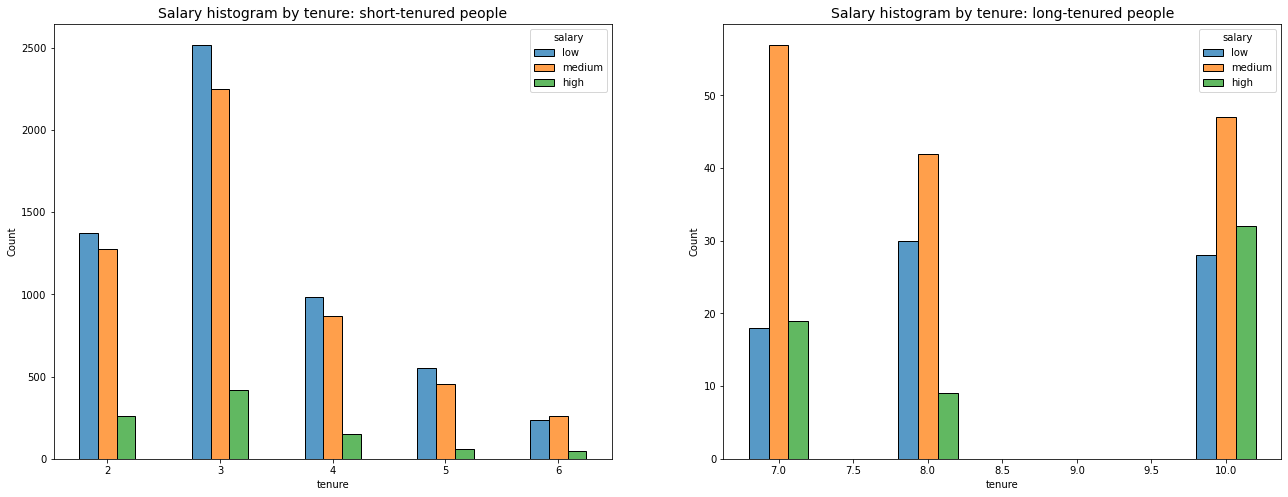

In [73]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

- Lower to medium paid employees seem to have a tenure ranged between 2-3 years
- Medium to higher paid employees seem to be more frequent in the longer tenured contracts
 - When compared with the satisfaction levels of shorter tenured epmployees it is possible that lower salaries are contributing to lower satisfaction scores of those who decide to leave the company within 2-3 years
 - There seems to be a significantly lower frequency of middle to high paying jobs whithin the longer tenure range, this could account for the employees who left with 6 years of tenure but high satisfaction, they have limited oppourtunity to secure a higher paying job within the company, a qualitative survey could be conducted with those employees with 6 years of tenure and higher satisfaction rates to investigate this further
- A potentially deeper investigation could be made in salary rises within the last 5 years could aid in deeping our understanding of the interactions between the salary change, promotion and departure variables
- For now though we can look to corrolate the promotion variable with departure

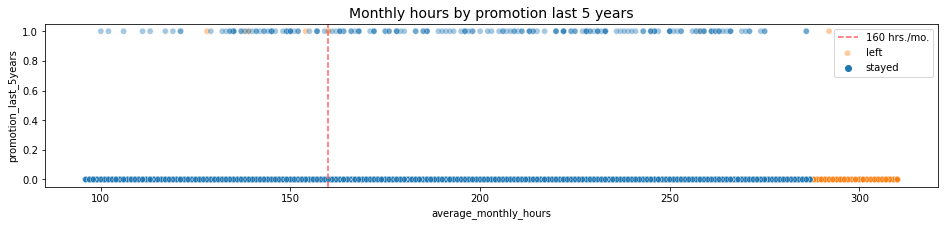

In [74]:
# Creating a plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', ls='--')
plt.legend(labels=['160 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

This plot immediatly reveals a few details:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours, over 200, on average per week were promoted
- almost all of the employees who left were working the longest hours

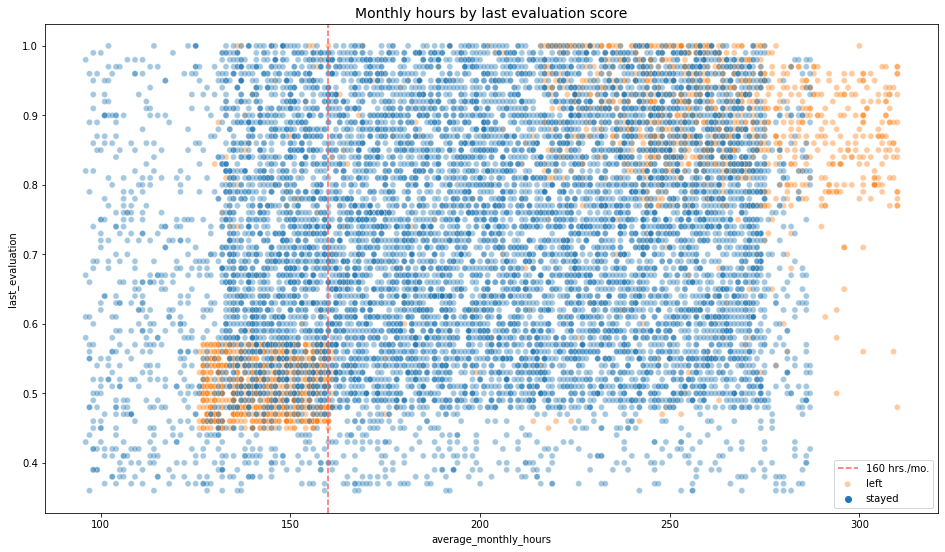

In [75]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['160 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

- Employees who left seem to fall in 2 categories here, those who had long average monthly hours, over 200 with high evaluations scores over 0.8 and then those with lower than average hours worked per month, less than 160, and lower evaluations scores below 0.6
- most employees here work well over the weekly average of 160
- with the precense of some markers around the bottom right quadrant and upper left, this can tell us there is no garuntee of longer hours leading to higher evaluation scores
- On the whole though, with the cloud cluster centred more towards the upper right quadrant, most employees who work longer hours will recieve better evaluation scores.

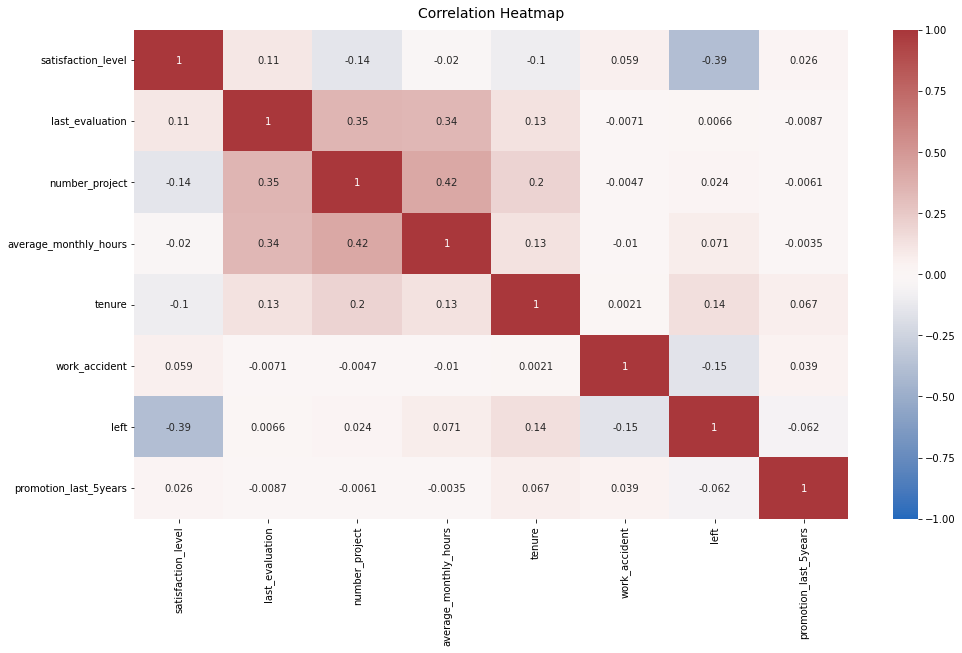

In [76]:
# Plotting an original correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- Number of projects, monthly hours, and evaluation scores all have some positive correlation with each other ranging in value from 0.34 - 0.42 
- Employee departure is negatively correlated with their satisfaction level.

A more granular analysis of the matrix is as follows:

Negatives:

1. The strongest negative correlation exists between satisfaction_level and left (-0.39) and indicates that employees with lower satisfaction levels are more likely to leave the company.

2. There is a weak positive correlation between tenure and average_monthly_hours (0.13), suggesting that employees with longer tenure tend to have slightly higher average monthly working hours.

3. Work_accident and left have a weak negative correlation (-0.15), indicating that employees who have experienced a work accident are slightly less likely to leave the company.

4. Tenure and left have a weak negative correlation (-0.14), indicating that employees with longer tenure are slightly less likely to leave the company.

Positives

5. The strongest positive correlation (0.42) exists between number of projects and average_monthly_hours indicating that employees who work on more projects tend to have higher average monthly working hours.


6. Last evaluation and number of projects have a moderate positive correlation (0.35) indicating that employees who work on more projects are being marked higher on their evaluations

7. There are slight positive correlations between last_evaluation and average_monthly_hours (0.34) potentially indicating that employees who work more hours will tend to have higher last_evaluation scores.

Overall, the correlation matrix provides valuable insights into the relationships between different variables, helping to identify potential factors that may contribute to employee turnover and other interesting patterns in the data, and with the aid of the heatmap color map allows viewers to quickly understand the key correlation patterns through easily discernable colors

### Insights

- Employees seem to be leaving the company due to a variety of factors, including long hours and too many projects for their bandwidth. This has caused them in some cases to give low satisfaction scores. This can be attributed to poor management. These seems to be the main driving factos in empployees leaving for avoidable reasons.

- However some may be leaving despite being happy due to a low volume of higher paying more senior jobs. 

- Others with low performance evaluations and low hours could also be those who are actively being dismissed by the company


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This task will require predicting a binary or discrete outcome based on a series of continious independant variables

### Identify the types of models most appropriate for this task.

As a result, a binomial logistic regression would be a good choice of model for this kind of task

### Modeling

Add as many cells as you need to conduct the modeling process.

## Prepping the Data for Modelling

In [77]:
#Creating a new data frame to be prepped for modelling with encoding as a copy to be able to refer back to df1

df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category to respect the heirachy of values

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

# Dummy encode the `department` column as they have a nominal value with no heirachy
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


In [78]:
# Dropping entries with outliers in the tenure field as this type of modelling is sensitive to outliers and it may affect the quality of the result

# previously defined variables containing the upper and lower limits being reused
# new cleaned df being saved as a new variable

df_enc2 = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_enc2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0


## Evaluating the Correlation of the Potential Variables

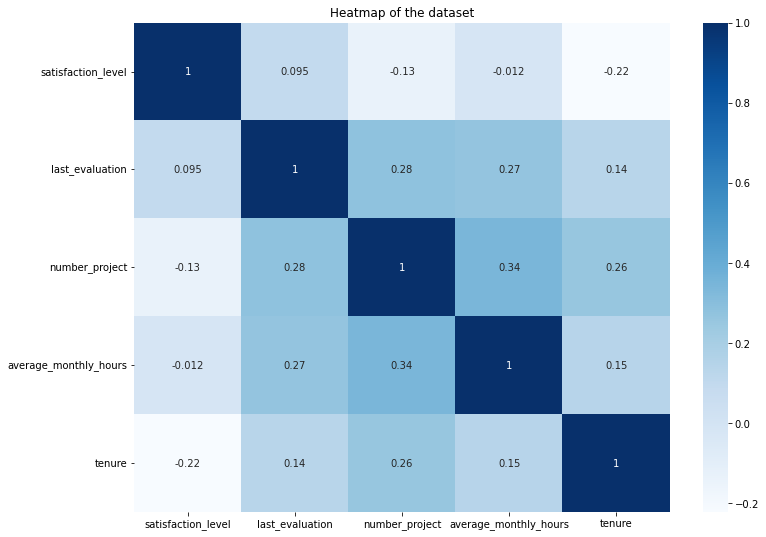

In [79]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_enc2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), cmap = "Blues", annot=True)
plt.title('Heatmap of the dataset')
plt.show()

## Setting up Variables and Test and Training Data Sets

In [80]:
df_enc2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [81]:
#Seperating the outcome Variable from the features in the prepared data set ready for analysis

#Features
X = df_enc2.drop('left', axis=1)

#Outcome Variable
Y = df_enc2['left']

In [82]:
# splitting the data into training and test sets

#stratification is implemented as there is a decent imabalance in the outcome variable 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (7816, 18) y_train: (7816,)
Testing set shape - X_test: (3351, 18) y_test: (3351,)


## Building and Testing the Model

In [83]:
#constructing the regression model classifier and fitting it to the training data set

clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [84]:
#obtaining coefficients 
clf.coef_

array([[-4.31927034e+00, -4.11412849e-02, -4.83061733e-01,
         3.75121704e-03,  1.10250729e+00, -1.46762366e+00,
        -1.14614272e+00, -5.46545336e-01, -8.12585872e-02,
        -3.12662382e-01, -2.54506035e-01,  1.90020911e-02,
        -1.96578172e-01, -9.03448685e-02, -1.98030704e-01,
         2.74398085e-02,  2.17161701e-02,  3.27517952e-02]])

In [85]:
#obtaining the intercept
clf.intercept_

array([-1.34704452])

In [86]:
# Use the trained logistic regression model to make predictions on the test set
y_pred = clf.predict(X_test)

# Display the first few predicted values
print("Predicted values for the test set:")
print(y_pred[:10])

Predicted values for the test set:
[0 0 0 0 1 0 0 0 0 1]


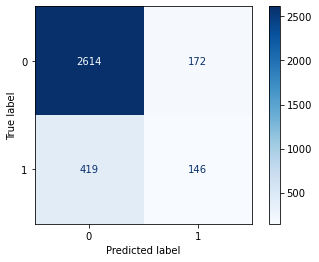

In [87]:
#calculating matrix quadrant values

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=clf.classes_)

# Ploting the confusion matrix
disp.plot(values_format='', cmap = "Blues")

# Display plot
plt.show()

The upper-left quadrant displays true negative value count
The upper-right quadrant displays the false positives value count
The bottom-left quadrant displays the false negatives value count
The bottom-right quadrant displays the true positives value count

- True negatives: The number of people who did not leave that the model accurately predicted did not leave
 - 2614

- False positives: The number of people who did not leave the model inaccurately predicted as leaving.
 - 172

- False negatives: The number of people who left that the model inaccurately predicted did not leave
 - 419

- True positives: The number of people who left the model accurately predicted as leaving
 - 146

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. This model has errors so it is necessary to check the class balance and produce a metrics report to assess the quality of this model.

In [88]:
#checking class balance

df_enc2['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

This is quite a strong class imbalance and may affect the peformance of the model, with 83.1% of employees remaining and 16.9% leaving the company

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [89]:
# Creating a classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.46      0.26      0.33       565

                 accuracy                           0.82      3351
                macro avg       0.66      0.60      0.61      3351
             weighted avg       0.79      0.82      0.80      3351



Next I want to obtain an AUC_ROC Curve Plot for this model to further assess performance

In [94]:
#Obtaining probabilities for the positive class

y_probs = clf.predict_proba(X_test)[:, 1]


In [96]:
# Compute ROC curve and AUC score

#False Poitive and True Positive rates
fpr, tpr, _ = roc_curve(y_test, y_probs)


# Directly compute AUC score
roc_auc = roc_auc_score(y_test, y_probs)  

print(roc_auc)

0.8810385683156617


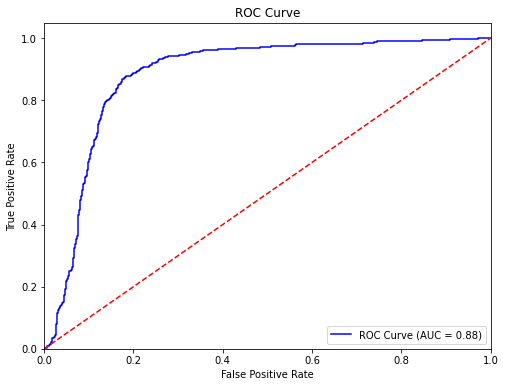

In [98]:
# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

With an AUC score of 0.881 this model correctly ranks positive cases higher than negative cases 88.1% of the time, thereofre suggesting a strong abilitu to distinguish between classes, though there may still be some misclassificaitons

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




# **Model Performance Analysis**

## **1. Overall Model Performance**
- **Accuracy: 82%**  
  - 82% of all predictions are correct.  
  - However, accuracy alone can be misleading, especially with class imbalances.  
- **Macro Avg (66% Precision, 60% Recall, 61% F1-score)**  
  - Considers both classes equally, showing **moderate performance overall**.  
- **Weighted Avg (79% Precision, 82% Recall, 80% F1-score)**  
  - Favors the **majority class**, so it appears stronger than the macro average.  

---

## **2. Class Breakdown**
### **Class: "Would Not Leave" (Majority Class)**
- **Precision: 86%** → When the model predicts an employee will **not** leave, it is correct **86%** of the time.  
- **Recall: 94%** → The model correctly identifies **94% of employees who actually won’t leave**.  
- **F1-score: 90%** → A strong balance between precision and recall.  
- **Interpretation:** The model is **very good at detecting employees who will stay**.  

### **Class: "Would Leave" (Minority Class)**
- **Precision: 46%** → When the model predicts an employee **will leave**, it is correct **only 46%** of the time.  
- **Recall: 26%** → The model captures **only 26% of actual leavers**, meaning it **misses 74% of them**.  
- **F1-score: 33%** → Shows **weak performance** in predicting employee departures.  
- **Interpretation:** The model **struggles to detect employees who will leave**, which is a concern for HR.  

---

## **3. Key Issues & Recommendations**
### **a) Severe Class Imbalance**
- Employees who **"Would Not Leave"** dominate the dataset.  
- This skews the model to perform well on that class but **poorly on "Would Leave"**.  
- **Fix:** Use **oversampling (SMOTE)** or **undersampling** to balance classes.  

### **b) Low Recall for "Would Leave" (26%)**
- The model **fails to identify most leavers**, meaning HR might **miss warning signs**.  
- **Fix:** Adjust **class weights (`class_weight='balanced'`)** or **lower the decision threshold**.  

### **c) Low Precision for "Would Leave" (46%)**
- When the model predicts **someone will leave, it is often wrong**.  
- **Fix:** Improve **feature selection** or try a different model (e.g., **Random Forest, XGBoost**).  

---

## **Final Thoughts**
This model is **strong at predicting who will stay but weak at predicting who will leave**. Given its **low recall for "Would Leave"**, HR may **struggle to intervene in time to retain employees**. Improving model balance and recall is **critical** for better decision-making.  


### Conclusion, Recommendations, Next Steps

Taken from the summary

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on to limit overworking.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees have not yet been promoted.   
* Furthermore offer support for upskilling and further qualifications to develop employees internally and provide a clear career progresion path with aims and goals
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work longer hours, consider establishing a more rigorous criteria for performance evaluation that is meritocratic and driven by results
* Consider implementing performance based incentives such as bonuses to compound on a more rigorous evaluation system
* To address high turover in specific departments such as Marketing and Management, hold focus group discussions to identify specific greivenaces and offer training to Management in these departments to aid them in this high intensity environment


### **Next Steps**

The model could be reworked with a more balanced class representaiton for leavers, the implementation of undersampling or oversampling can be considered to rectify this balance in a new model which will perform better on a classification report for the "Would Leave" class in order to more accurately predict leavers. 

### **Potential Data Leakage Concern**
It may be justified to still have some concern about data leakage, particularly with the `last_evaluation` feature. If performance evaluations are conducted infrequently, they may be **too close to an employee's resignation**, making them a **post-decision** rather than an independent predictor. Additionally, if an employee’s departure influences their final evaluation (e.g., low performance leads to termination), using `last_evaluation` could introduce **data leakage** into the model. To ensure robustness, it would be prudent to analyze how the model’s predictions change when `last_evaluation` is removed. 

- **Potential leakage:** If evaluations occur near resignation, they may reflect departure decisions rather than predict them.  
- **Testing needed:** Train the model without `last_evaluation` and compare performance (AUC, precision, recall).  
- **Alternative approach:** If evaluation scores dictate retention, consider predicting performance instead of retention.  

### **Predicting Employee Performance & Satisfaction**
It is also worth considering whether **predicting employee performance and satisfaction** could be more meaningful than predicting retention directly. If evaluation scores play a **key role in determining attrition** (e.g., low scores lead to job loss or voluntary departure), then modeling performance could allow HR to intervene earlier. Similarly, `satisfaction_score` may not be a true predictor if it is measured **after an employee has already decided to leave**. If satisfaction is consistently low right before departure, it may function more as a **symptom** rather than a cause of attrition. 

- **Performance as a predictor:** If evaluations strongly influence retention, predicting `last_evaluation` instead may be more useful.  
- **Satisfaction score timing:** If satisfaction is measured post-decision, it may reflect attrition rather than predict it.  
- **Recommended test:** Compare model performance with and without `satisfaction_score` to assess its predictive value.  


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.